___

<a href='http://www.pieriandata.com'> <img src='./Pierian_Data_Logo.png' /></a>
___
# Plotly and Cufflinks

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images). Cufflinks connects plotly with pandas.

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    pip install plotly
    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [131]:
# Recommended: Use %pip to ensure it installs in the correct kernel environment
%pip install plotly cufflinks

Note: you may need to restart the kernel to use updated packages.


In [132]:
import plotly
print(plotly.__version__)

4.14.3


In [133]:
import cufflinks as cf
print(cf.__version__)

0.17.3


In [134]:
import pandas as pd
import numpy as np
%matplotlib inline

In [135]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# is needed only when you're working in an offline, notebook-based environment (like Jupyter Notebook) and want to use Plotly for interactive visualizations without relying on the internet.

print(__version__) # requires version >= 1.9.0

4.14.3


In [136]:
import cufflinks as cf

In [137]:
# For Notebooks
init_notebook_mode(connected=True)
'''
when you're using Plotly inside a Jupyter Notebook to ensure that the necessary JavaScript library (Plotly.js) is loaded and available for rendering interactive plots inline (i.e., directly in the notebook).

🔧 What does it do?
Plotly plots are interactive and rendered using JavaScript. Inside a Jupyter Notebook, the browser needs to load the Plotly JavaScript files in order to:
display charts inline (inside the notebook cells)
enable zoom, pan, hover, tooltips, etc.
''';

In [138]:
# For offline use
cf.go_offline()

In [139]:
'''
the core difference between static vs. interactive plotting libraries:

🔹 Why "offline vs. online" matters in Plotly (and Cufflinks):
Plotly and Cufflinks generate interactive charts using JavaScript (Plotly.js). This means:
Charts need JavaScript code to be rendered in a browser (including Jupyter Notebook).
This JavaScript can either be:
Loaded from the internet (CDN) → "online mode"
Loaded locally → "offline mode"
So when using Plotly/Cufflinks, the library must know:
where to find the JS libraries,
and whether to try loading them from the internet or from your local machine.

That's why you see things like:
    from plotly.offline import init_notebook_mode
    init_notebook_mode(connected=True)  # or False
or in Cufflinks:
    cf.go_offline()

🔹 Why this isn't a thing in Matplotlib or Seaborn:
These libraries create static plots using Python only — no need for JavaScript, no browser rendering.
Seaborn is a high-level API built on top of Matplotlib, which renders directly to image formats (PNG, SVG, etc.) using Python’s backends.
All plotting is done in Python, so no network or JavaScript involved.
Therefore, online/offline doesn’t matter — they work fully offline by default.
''';

### Fake Data

In [140]:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

In [141]:
df.head()

,A,B,C,D
0,0.444045,1.374404,1.229760,0.948958
1,-0.602350,-2.521673,-0.587041,-2.172917
2,0.714069,-0.038773,-0.200163,-0.403342
3,-0.442325,-1.036495,-0.851677,1.852228
4,0.341271,1.001678,0.023080,-0.837375


In [142]:
df.max()

A    2.918641
B    3.053107
C    3.067165
D    2.160120
dtype: float64

In [143]:
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})

In [144]:
df2.head()

,Category,Values
0,A,32
1,B,43
2,C,50


## Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

## Scatter

In [145]:
df.head()

,A,B,C,D
0,0.444045,1.374404,1.229760,0.948958
1,-0.602350,-2.521673,-0.587041,-2.172917
2,0.714069,-0.038773,-0.200163,-0.403342
3,-0.442325,-1.036495,-0.851677,1.852228
4,0.341271,1.001678,0.023080,-0.837375


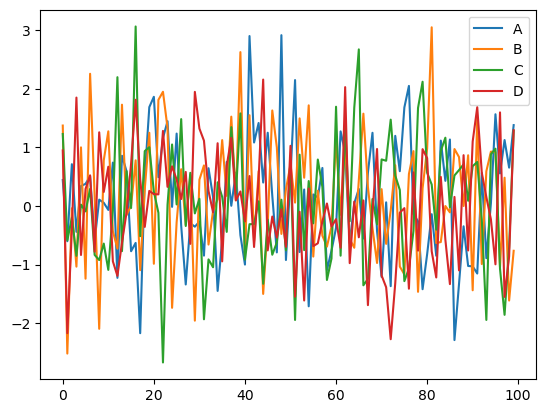

In [146]:
df.plot();
'''
df.plot(): it creates a plot (usually a line plot) based on the data in your DataFrame df.

🔍 What happens under the hood:
df.plot() is a shortcut to pandas.DataFrame.plot(), which by default uses Matplotlib to generate plots.
If your DataFrame has numeric columns, it will plot each numeric column as a separate line against the index (x-axis).
''';

In [147]:
df.max()

A    2.918641
B    3.053107
C    3.067165
D    2.160120
dtype: float64

In [148]:
df.min()

A   -2.291518
B   -2.521673
C   -2.674101
D   -2.276562
dtype: float64

In [149]:
df.iplot()
'''
When you use:
    df.iplot()
you're using Plotly, specifically through the cufflinks library, which connects Pandas and Plotly.

🔧 Here's how it works:
    df.iplot() comes from the cufflinks package.
    It allows you to create interactive Plotly charts directly from Pandas DataFrames.
    The "i" in iplot stands for interactive — so the charts are zoomable, hoverable, and dynamic.
''';

In [150]:
df.iplot(kind='scatter',x='A',y='B')    #you have to do specify mode and passing the string 'markers'. Then you will actually get some markers.

In [151]:
df.iplot(kind='scatter',x='A',y='B',mode='markers',size=10)

In [152]:
df.iplot(
    kind='scatter',
    x='A',
    y='B',
    mode='markers',
    size=10,
    xTitle='Your X Axis Label',
    yTitle='Your Y Axis Label',
    title='Your Plot Title'
)

## Bar Plots

In [153]:
df2

,Category,Values
0,A,32
1,B,43
2,C,50


In [154]:
df2.pivot(columns='Category', values='Values')

Category,A,B,C
0,32.0,NaN,NaN
1,NaN,43.0,NaN
2,NaN,NaN,50.0


In [155]:
df2.pivot(columns='Category', values='Values').iplot(kind='bar')
'''
unfortunately, df2.iplot(...) (from Plotly + Cufflinks) does not automatically assign a different color to each bar by default when using kind='bar' with a single trace. It treats all bars as one trace and applies a single color unless you manually provide the colors argument or plot it as multiple traces.

However, here's a trick to get automatic coloring per bar without manually generating colors:
You can pivot the dataframe so each category becomes a separate trace (column) — iplot will then assign a different default color to each trace automatically:
'''


"\nunfortunately, df2.iplot(...) (from Plotly + Cufflinks) does not automatically assign a different color to each bar by default when using kind='bar' with a single trace. It treats all bars as one trace and applies a single color unless you manually provide the colors argument or plot it as multiple traces.\n\nHowever, here's a trick to get automatic coloring per bar without manually generating colors:\nYou can pivot the dataframe so each category becomes a separate trace (column) — iplot will then assign a different default color to each trace automatically:\n"

In [156]:
df2.iplot(kind='bar')

In [157]:
df2.iplot(kind='bar',x='Category',y='Values')

In [158]:
df.iplot(kind='bar')

In [159]:
df.count().iplot(kind='bar') #we want to count instances for each column

In [160]:
df.sum().iplot(kind='bar')  #This bar plot with iplot becomes really powerful when you call some sort of aggregate function or a groupby function on your dataframe.

## Boxplots

In [161]:
df.iplot(kind='box')
'''
by default, df.iplot(kind='box') does not show outliers.
The iplot function from cufflinks (which integrates pandas and plotly) doesn't display outliers in box plots unless you explicitly tell it to.
'''

"\nby default, df.iplot(kind='box') does not show outliers.\nThe iplot function from cufflinks (which integrates pandas and plotly) doesn't display outliers in box plots unless you explicitly tell it to.\n"

In [162]:
df.iplot(kind='box', boxpoints='outliers')

In [163]:
df.head()

,A,B,C,D
0,0.444045,1.374404,1.229760,0.948958
1,-0.602350,-2.521673,-0.587041,-2.172917
2,0.714069,-0.038773,-0.200163,-0.403342
3,-0.442325,-1.036495,-0.851677,1.852228
4,0.341271,1.001678,0.023080,-0.837375


In [164]:
import pandas as pd
import plotly.graph_objects as go

# Your actual DataFrame
# df = pd.read_csv(...) or however you define it

# Create box traces for each column
fig = go.Figure()

for col in df.columns:
    fig.add_trace(go.Box(
        y=df[col],
        name=col,
        boxpoints='outliers',
        marker_color='lightblue',
        line_color='blue'
    ))

# Add dashed lines for the mean of each column
for i, col in enumerate(df.columns):
    mean_val = df[col].mean()
    fig.add_shape(
        type='line',
        x0=i - 0.25, x1=i + 0.25,  # width of the box
        y0=mean_val, y1=mean_val,
        line=dict(color='red', width=2, dash='dash'),
        xref='x', yref='y'
    )

fig.update_layout(
    title='Box plot with mean lines',
    yaxis_title='Values',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(len(df.columns))),
        ticktext=list(df.columns)
    )
)

fig.show()


In [165]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [166]:
# for col in df.columns:
#     print(df[col])

In [167]:
list(enumerate(df.columns))

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D')]

In [168]:
import pandas as pd #pandas is used for handling the DataFrame df.
import plotly.graph_objects as go #plotly.graph_objects (aliased as go) is the low-level module for creating highly customizable plots.
import random

# Create a color generator
def random_color():
    return f'rgb({random.randint(0,255)}, {random.randint(0,255)}, {random.randint(0,255)})'

# Initialize an empty Plotly figure: 
fig = go.Figure()   #This creates an empty Plotly figure object, which you'll populate with traces (like box plots and scatter points) and shapes (like dashed lines).


# Add a box plot for each column in the DataFrame
for col in df.columns:
    fig.add_trace(go.Box(
        y=df[col],
        name=col,
        boxpoints='outliers',
        marker_color='lightblue',
        line_color=random_color(),  # different color per box
    ))
'''
for col in df.columns: loops through each column (A, B, C, D, etc.).
go.Box() creates a box plot:
y=df[col]: Data to plot on the vertical axis.
name=col: Label for each box (on the x-axis).
boxpoints='outliers': Show only outliers.
marker_color & line_color: Set the fill and border colors of each box.
✅ Effect: This loop adds one box plot per column of your DataFrame.
'''

# Add dashed lines and red dots using categorical x-axis
for i, col in enumerate(df.columns):    #print(list(enumerate(df.columns)):  [(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D')]
    mean_val = df[col].mean()
    fig.add_shape(
        type='line',
        x0=i - 0.25, x1=i + 0.25,  # width of the box
        y0=mean_val, y1=mean_val,
        line=dict(color='red', width=2, dash='dash'),
        xref='x', yref='y'
    )
    fig.add_trace(go.Scatter(
    x=[col],
    y=[mean_val],
    mode='markers',
    marker=dict(color='red', size=8, symbol='circle'),
    hovertemplate=f"<b>{col}</b><br>Mean: {mean_val:.2f}<extra></extra>",
    showlegend=False
    ))
'''
enumerate(df.columns) gives both the index i (0, 1, 2...) and the column name.
df[col].mean() computes the mean value of that column.
fig.add_shape(...) adds a horizontal red dashed line across the center of each box.
Adds a single red dot (go.Scatter) on each box, positioned exactly at its mean value.
hovertemplate: Custom text when hovering over the dot (e.g., shows "Mean: 0.12").
showlegend=False: Hides this trace from the plot legend.

"<extra></extra>"
Suppresses the default extra hover info (like trace name or x/y values shown by default).
'''
fig.update_layout(
    title='Box plot with centered mean lines and markers',
    yaxis_title='Values',
)

fig.show()


In [169]:
import plotly.express as px # A concise, high-level API for quickly creating plots (like box plots).
import pandas as pd

df_melted = df.melt(var_name='Category', value_name='Value')    #This reshapes your wide-format DataFrame (df) into a long-format (or tidy format) DataFrame called df_melted.
fig = px.box(df_melted, x='Category', y='Value', points='outliers') 
'''
This creates a box plot where:
    x='Category': Each unique value in the "Category" column (like A, B, C) gets its own box.
    y='Value': These are the actual data values used to build the box plot.
    points='outliers': This makes sure outlier data points are shown on the plot (otherwise, only the box and whiskers are shown).
'''
fig.show()


In [184]:
type(df_melted) #pandas.core.frame.DataFrame
df_melted.shape #(400, 2)

(400, 2)

In [170]:
df.head()

,A,B,C,D
0,0.444045,1.374404,1.229760,0.948958
1,-0.602350,-2.521673,-0.587041,-2.172917
2,0.714069,-0.038773,-0.200163,-0.403342
3,-0.442325,-1.036495,-0.851677,1.852228
4,0.341271,1.001678,0.023080,-0.837375


In [171]:
df_melted.head()
df_melted.shape #(400, 2)

(400, 2)

In [ ]:
trace = go.Box(x=[1,2,3,3,3,4,5])
data = [trace]
iplot(data)
'''
go.Box: creates a box plot (also known as a box-and-whisker plot), which summarizes a distribution of values.

x=[1, 2, 3, 3, 3, 4, 5] is the data you're plotting. Since you're passing data in the x axis, Plotly assumes you're plotting horizontal boxes (along the x-axis).
If you wanted a vertical box plot, you should use y=[...] instead.

data = [trace]
You are putting the trace (which holds your box plot) into a list.

Plotly functions (like iplot) expect a list of traces, so this is necessary even if there's only one plot.

iplot(data)
This displays the box plot inline in a Jupyter notebook (or compatible environment like VS Code with Jupyter extension).

iplot is from plotly.offline, used when you're working offline (i.e., not using Plotly cloud services).
'''

In [181]:
trace = go.Box(y=[1,2,3,3,3,4,5])
data = [trace]
iplot(data)

## 3d Surface

In [172]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
df3.iplot(kind='surface',colorscale='rdylbu')

## Spread

In [173]:
# df[['A','B']].iplot(kind='spread')



import pandas as pd
import plotly.express as px

# Example DataFrame
df77 = pd.DataFrame({
    'A': [10, 12, 14, 16, 18],
    'B': [9, 11, 13, 17, 20]
})

# Compute spread
df77['Spread'] = df77['A'] - df77['B']
df77['Index'] = df77.index  # Optional: useful for x-axis labeling

# Plot with Plotly Express
fig = px.line(df77, x='Index', y='Spread', title='Spread between A and B')

# Color positive/negative parts (optional enhancement)
fig.add_hline(y=0, line_dash='dash', line_color='gray')  # zero reference line

fig.show()
print(df77.index)


RangeIndex(start=0, stop=5, step=1)


## histogram

In [174]:
df['A'].iplot(kind='hist',bins=25)

In [177]:
df.iplot(kind='hist',bins=25)

In [ ]:
df.iplot(kind='bubble',x='A',y='B',size='C') #It's just a scatter plot except the size of the points is based off another column's value.

## scatter_matrix()

Similar to sns.pairplot()

In [ ]:
df.scatter_matrix() #very similar to sns.pairplot() and pandas.plotting.scatter_matrix()

# Great Job!


---

The two most commonly used modules in Plotly are:

### 1. plotly.express (aka px)  
High-level API for quickly creating beautiful charts.  
**Best for:** Fast prototyping, exploratory data analysis.  
**Syntax:** Simple, like `px.box()`, `px.bar()`, `px.scatter()`, etc.  
Automatically handles: axes, colors, legends, etc.  
*Think of it as the "seaborn of Plotly."*

### 2. plotly.graph_objects (aka go)  
Low-level, fully customizable API.  
Gives you full control over traces, shapes, layout, annotations, etc.  
**Best for:** Custom, interactive dashboards, reports, and fine-tuned visuals.  
*Think of it as the "matplotlib of Plotly."*

---

### Are there other important modules?  
Yes, but they’re less commonly used for standard plotting:

- **plotly.subplots**  
  For arranging multiple plots (traces) in a grid layout.  
  Often used with `graph_objects`.

- **plotly.figure_factory**  
  For specialized plots like:  
  - Distplots (histogram + KDE)  
  - Dendrograms  
  - Annotated heatmaps

- **dash**  
  A separate framework built on Plotly for creating interactive web apps with Python.  
  Very powerful, but not needed just for plotting.

---

### Summary:

| Module               | Purpose                           | Common Use                    |
|----------------------|---------------------------------|------------------------------|
| plotly.express       | Fast, high-level charts          | ✅ Very common                |
| plotly.graph_objects | Full control and customization  | ✅ Very common                |
| plotly.subplots      | Layout management for multiple plots | ☑️ Sometimes             |
| plotly.figure_factory| Specialized chart types          | ☑️ Niche                     |
| dash                 | Build web apps with Plotly       | ✅ (for apps, not just charts)|
